# Распределение значений датчиков в статике

Загружаем данные из файла метрик

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from loader import load_data 

df_white_forward_bend = load_data('./data/all_sensors_on_white_static_forward_bend.log')
mean_df_white_forward_bend = df_white_forward_bend.groupby("sensor",as_index=False).mean()

### Распределение значений от разных датчиков

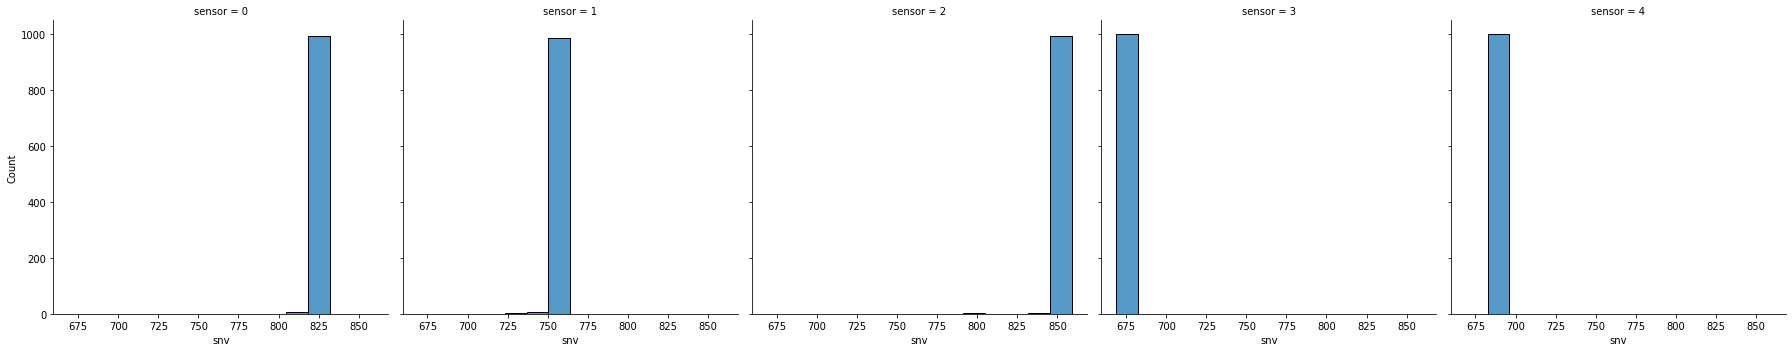

In [2]:
sns.displot(data=df_white_forward_bend, x="snv", col='sensor', multiple="stack",)
plt.tight_layout()

Видно, что у разных датчиков разные значения. Измерения одного датчика 

In [3]:
df_white_backward_bend = load_data('./data/all_sensors_on_white_static_backward_bend.log')
print(df_white_backward_bend)
mean_df_white_backward_bend = df_white_backward_bend.groupby("sensor",as_index=False).mean()

      snv  sensor
0     721       0
1     665       1
2     735       2
3     598       3
4     609       4
...   ...     ...
4995  722       0
4996  665       1
4997  736       2
4998  597       3
4999  609       4

[5000 rows x 2 columns]


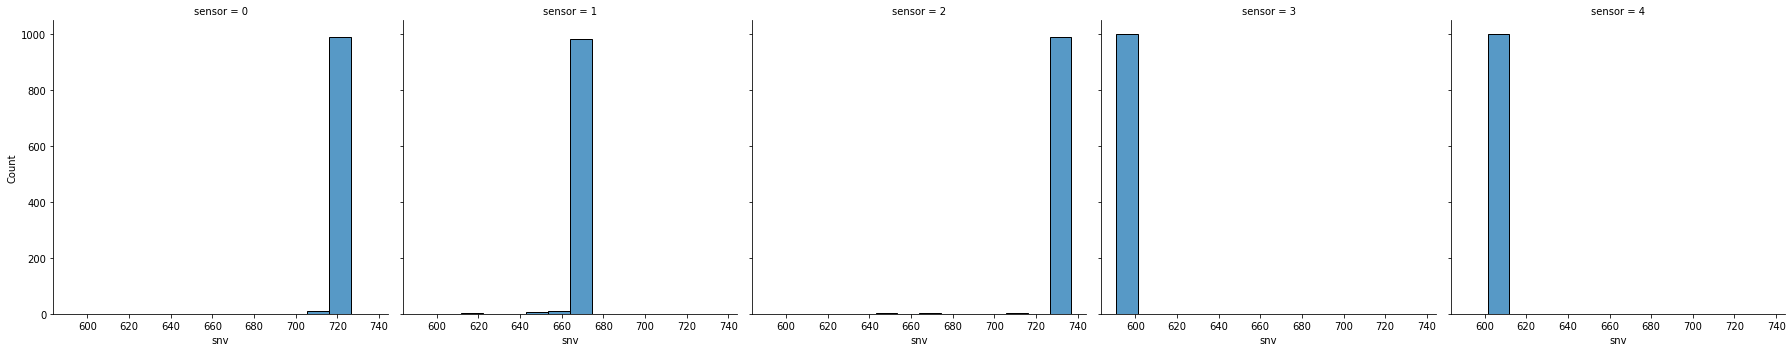

In [4]:
sns.displot(data=df_white_backward_bend, x="snv", col='sensor', multiple="stack",)
plt.tight_layout()

### Влияние наклона вперед/назад на значения датчиков

In [5]:
print(mean_df_white_forward_bend)
print(mean_df_white_backward_bend)

   sensor      snv
0       0  823.397
1       1  756.714
2       2  857.520
3       3  669.987
4       4  689.794
   sensor      snv
0       0  721.861
1       1  664.709
2       2  735.460
3       3  597.512
4       4  608.297


0    12.331354
1    12.158491
2    14.234070
3    10.817374
4    11.814687
Name: snv, dtype: float64

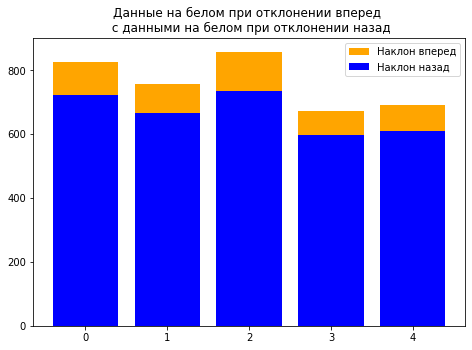

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mean_df_white_forward_bend["sensor"],mean_df_white_forward_bend["snv"], color = 'orange')
ax.bar(mean_df_white_backward_bend["sensor"],mean_df_white_backward_bend["snv"], color = 'blue')
ax.set_title("Данные на белом при отклонении вперед \n с данными на белом при отклонении назад")
ax.legend(['Наклон вперед','Наклон назад'],loc=1)

(mean_df_white_forward_bend["snv"]-mean_df_white_backward_bend["snv"])/mean_df_white_forward_bend["snv"]*100

При работе на белом фоне влияние значений отображено на графике и составляет порядка 10-14 процентов

0    16.472606
1    20.936856
2    28.318313
3     7.586138
4    22.678686
Name: snv, dtype: float64

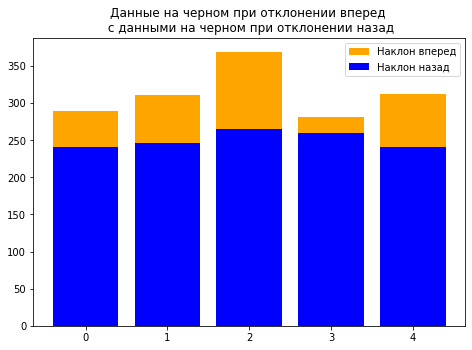

In [20]:
df_black_forward_bend = load_data('./data/all_sensors_on_black_static_forward_bend.log')
mean_df_black_forward_bend = df_black_forward_bend.groupby("sensor",as_index=False).mean()

df_black_backward_bend = load_data('./data/all_sensors_on_black_static_backward_bend.log')
mean_df_black_backward_bend = df_black_backward_bend.groupby("sensor",as_index=False).mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Данные на черном при отклонении вперед \n с данными на черном при отклонении назад")
ax.bar(mean_df_black_forward_bend["sensor"],mean_df_black_forward_bend["snv"], color = 'orange')
ax.bar(mean_df_black_backward_bend["sensor"],mean_df_black_backward_bend["snv"], color = 'blue')
ax.legend(['Наклон вперед','Наклон назад'],loc=1)

(mean_df_black_forward_bend["snv"]-mean_df_black_backward_bend["snv"])/mean_df_black_forward_bend["snv"]*100

Видно, что на черном влиение отклонения тоже сильное - от 7% до 28%

Сравним значения датчиков на белом и на черном

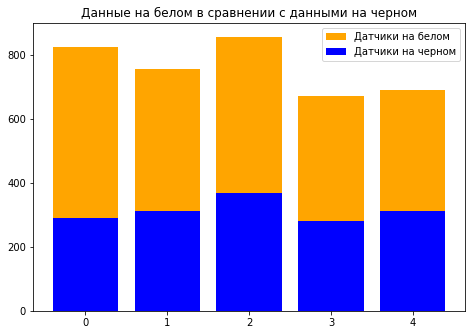

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Данные на белом в сравнении с данными на черном")
ax.bar(mean_df_white_forward_bend["sensor"],mean_df_white_forward_bend["snv"], color = 'orange')
ax.bar(mean_df_black_forward_bend["sensor"],mean_df_black_forward_bend["snv"], color = 'blue')
ax.legend(['Датчики на белом','Датчики на черном'],loc=1)
plt.show()

**Выводы:**

- Необходимо устранить колебания вперед/назад. 
- Необходимо выполнить калибровку датчиков для устранения разницы в передаваемых величинах 


### Без калибровки

1. Распределение показаний датчиков в статике на белом +
1. Распределение показаний датчиков в статике на белом в положении наклона впреред+
1. Распределение показаний датчиков в статике на белом в положении наклона назад+
1. Распределение показаний датчиков в статике на черном+
1. Распределение показаний датчиков в статике на черном в положении наклона впреред+
1. Распределение показаний датчиков в статике на черном в положении наклона назад+

### C калибровкой

1. Распределение показаний датчиков в статике на белом с калибровкой
1. Распределение показаний датчиков в статике на черном с калибровкой



